<a href="https://colab.research.google.com/github/gift-framework/GIFT/blob/main/notebooks/Joyce_Formalization_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Joyce's Perturbation Theorem for G2 Manifolds

## A Pedagogical Introduction to Torsion-Free G2 Structures on K7

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gift-framework/GIFT/blob/main/notebooks/Joyce_Formalization_Tutorial.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/gift-framework/GIFT/main?labpath=notebooks%2FJoyce_Formalization_Tutorial.ipynb)

---

**Author:** GIFT Framework Team  
**Version:** 1.0.0  
**License:** MIT  

This notebook provides a pedagogical introduction to **Joyce's Perturbation Theorem** (1996) and its application to the GIFT K7 manifold. We demonstrate how the theorem guarantees the existence of a torsion-free G2 structure, implying a Ricci-flat metric with holonomy contained in G2.

### Learning Objectives

By the end of this notebook, you will understand:

1. **G2 holonomy manifolds** - What they are and why they matter for physics
2. **Joyce's Perturbation Theorem** - The mathematical statement and its significance
3. **The K7 manifold** - GIFT's specific 7-dimensional manifold construction
4. **Numerical verification** - How certified bounds verify the theorem's hypotheses
5. **Physical implications** - Ricci-flatness and connections to M-theory

## 0. Setup

Run this cell to install `giftpy` and required packages. This works on **Google Colab**, **Binder**, or any local Python environment.

In [1]:
# Install giftpy (the GIFT Python package)
import subprocess
import sys

def install_if_missing(package, pip_name=None):
    """Install a package if not already available."""
    try:
        __import__(package)
        print(f"[ok] {package} already installed")
    except ImportError:
        pip_name = pip_name or package
        print(f"Installing {pip_name}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", pip_name])
        print(f"[ok] {pip_name} installed")

# Core dependencies
install_if_missing("gift_core", "giftpy")
install_if_missing("numpy")
install_if_missing("matplotlib")

print("\nAll dependencies ready.")

Installing giftpy...
[ok] giftpy installed
[ok] numpy already installed
[ok] matplotlib already installed

All dependencies ready.


In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

# Import giftpy modules
from gift_core import (
    # Topological constants
    DIM_E8, RANK_E8, DIM_G2, DIM_K7, B2, B3, H_STAR, P2, N_GEN,
    DET_G, KAPPA_T, TAU, SIN2_THETA_W,
    # Torsion classes
    W1_DIM, W7_DIM, W14_DIM, W27_DIM, W_SUM,
    # Joyce theorem - certified bounds (pre-computed)
    TORSION_BOUND, JOYCE_THRESHOLD, CONTRACTION_K,
    DET_G_BOUND, DET_G_TARGET,
)
from gift_core.analysis import JoyceCertificate, verify_pinn_bounds

# Configure matplotlib
plt.style.use('seaborn-v0_8-whitegrid')
%config InlineBackend.figure_format = 'retina'

print("All imports successful.")

All imports successful.


---

## 1. Mathematical Background

### 1.1 What is G2 Holonomy?

The **holonomy group** of a Riemannian manifold $(M, g)$ measures how tangent vectors rotate when parallel-transported around closed loops.

For a generic 7-manifold, the holonomy is $\mathrm{SO}(7)$. However, Berger's classification (1955) shows that the holonomy can be reduced to the **exceptional Lie group G2** if and only if:

1. The metric $g$ is **Ricci-flat**: $\mathrm{Ric}(g) = 0$
2. There exists a **parallel 3-form** $\varphi$: $\nabla \varphi = 0$

Such manifolds are called **G2 holonomy manifolds**.

### 1.2 Why Does This Matter for Physics?

In **M-theory** (the 11-dimensional unification of string theories), compactification on a G2 manifold:

- Preserves **N=1 supersymmetry** in 4D
- Produces **realistic gauge groups** from singularities
- Generates **chiral fermions** from intersecting branes

The GIFT framework uses the **K7 manifold** - a specific G2 manifold constructed via Twisted Connected Sum - to derive physical observables from pure topology.

In [3]:
# Display key topological data of K7
print("=" * 60)
print("              K7 MANIFOLD: TOPOLOGICAL DATA")
print("=" * 60)
print()
print(f"  Dimension:           dim(K7) = {DIM_K7}")
print(f"  Second Betti number: b2(K7)  = {B2}")
print(f"  Third Betti number:  b3(K7)  = {B3}")
print(f"  Total harmonic:      H*      = b2 + b3 + 1 = {H_STAR}")
print(f"  Euler characteristic: chi    = 0  (automatic by Poincare duality)")
print()
print(f"  G2 structure dimension: dim(G2) = {DIM_G2}")
print(f"  E8 gauge dimension:     dim(E8) = {DIM_E8}")
print()
print("=" * 60)

              K7 MANIFOLD: TOPOLOGICAL DATA

  Dimension:           dim(K7) = 7
  Second Betti number: b2(K7)  = 21
  Third Betti number:  b3(K7)  = 77
  Total harmonic:      H*      = b2 + b3 + 1 = 99
  Euler characteristic: chi    = 0  (automatic by Poincare duality)

  G2 structure dimension: dim(G2) = 14
  E8 gauge dimension:     dim(E8) = 248



### 1.3 The G2 3-Form

A **G2 structure** on a 7-manifold $M$ is specified by a 3-form $\varphi \in \Omega^3(M)$ whose stabilizer is exactly $\mathrm{G}_2 \subset \mathrm{GL}(7, \mathbb{R})$.

The **standard G2 3-form** on $\mathbb{R}^7$ is:

$$\varphi_0 = e^{123} + e^{145} + e^{167} + e^{246} - e^{257} - e^{347} - e^{356}$$

where $e^{ijk} = e^i \wedge e^j \wedge e^k$ denotes the wedge product of basis 1-forms.

Key facts:
- $\varphi$ has **35 independent components** (since $\binom{7}{3} = 35$)
- The 4-form $\psi = \star \varphi$ also has **35 components** (since $\binom{7}{4} = 35$)
- Together $(\varphi, \psi)$ determine the Riemannian metric $g$

### 1.4 Torsion and Torsion-Free Condition

Given a G2 structure $\varphi$, the **torsion** $T(\varphi)$ measures how far $\varphi$ is from being parallel.

The G2 structure is **torsion-free** if and only if:

$$d\varphi = 0 \quad \text{and} \quad d\psi = d(\star\varphi) = 0$$

This is equivalent to:
- $\nabla \varphi = 0$ (parallel 3-form)
- $\mathrm{Hol}(g) \subseteq \mathrm{G}_2$ (G2 holonomy)
- $\mathrm{Ric}(g) = 0$ (Ricci-flat metric)

The torsion decomposes into **four irreducible G2-representations**:

$$T = T_1 \oplus T_7 \oplus T_{14} \oplus T_{27}$$

In [4]:
# Display torsion classes
print("=" * 60)
print("           G2 TORSION DECOMPOSITION")
print("=" * 60)
print()
print(f"  T1  : {W1_DIM:2d}-dimensional  (scalar torsion)")
print(f"  T7  : {W7_DIM:2d}-dimensional  (vector torsion)")
print(f"  T14 : {W14_DIM:2d}-dimensional  (g2-valued torsion)")
print(f"  T27 : {W27_DIM:2d}-dimensional  (symmetric traceless)")
print(f"  " + "-" * 40)
print(f"  Total: {W_SUM:2d} dimensions")
print()
print(f"  Note: dim(G2) = {DIM_G2} = T14 (the Lie algebra)")
print(f"        dim(J3(O)) = 27 = T27 (Jordan algebra)")
print()
print("=" * 60)

           G2 TORSION DECOMPOSITION

  T1  :  1-dimensional  (scalar torsion)
  T7  :  7-dimensional  (vector torsion)
  T14 : 14-dimensional  (g2-valued torsion)
  T27 : 27-dimensional  (symmetric traceless)
  ----------------------------------------
  Total: 49 dimensions

  Note: dim(G2) = 14 = T14 (the Lie algebra)
        dim(J3(O)) = 27 = T27 (Jordan algebra)



---

## 2. Joyce's Perturbation Theorem (1996)

### 2.1 The Theorem Statement

**Theorem (Joyce, 1996).** *Let $(M^7, \varphi_0)$ be a compact 7-manifold with a G2 structure $\varphi_0$. If the torsion satisfies:*

$$\|T(\varphi_0)\| < \varepsilon_0$$

*for a threshold $\varepsilon_0$ depending on Sobolev constants, then there exists a **torsion-free** G2 structure $\varphi$ on $M$ with:*

1. *$d\varphi = 0$ (closed)*
2. *$d\star\varphi = 0$ (coclosed)*  
3. *$\|\varphi - \varphi_0\| = O(\|T(\varphi_0)\|)$ (close to initial)*

### 2.2 Key Insight

The theorem says: **if you can find an *approximately* torsion-free G2 structure, then a *truly* torsion-free one exists nearby.**

This is analogous to the Newton-Raphson method: if you're close enough to a root, iteration converges.

### 2.3 The Proof Strategy

Joyce's proof uses the **Banach Fixed-Point Theorem** (contraction mapping principle):

1. **Define the Joyce operator** $J: \varphi \mapsto \varphi - G(T(\varphi))$  
   where $G$ is the Green's operator for the Hodge Laplacian

2. **Show $J$ is a contraction** with constant $K < 1$:  
   $\|J(\varphi_1) - J(\varphi_2)\| \leq K \|\varphi_1 - \varphi_2\|$

3. **Apply Banach's theorem**: There exists a unique fixed point $\varphi^*$ with:  
   $J(\varphi^*) = \varphi^* \implies T(\varphi^*) = 0$

The torsion-free G2 structure $\varphi^*$ exists and is unique!

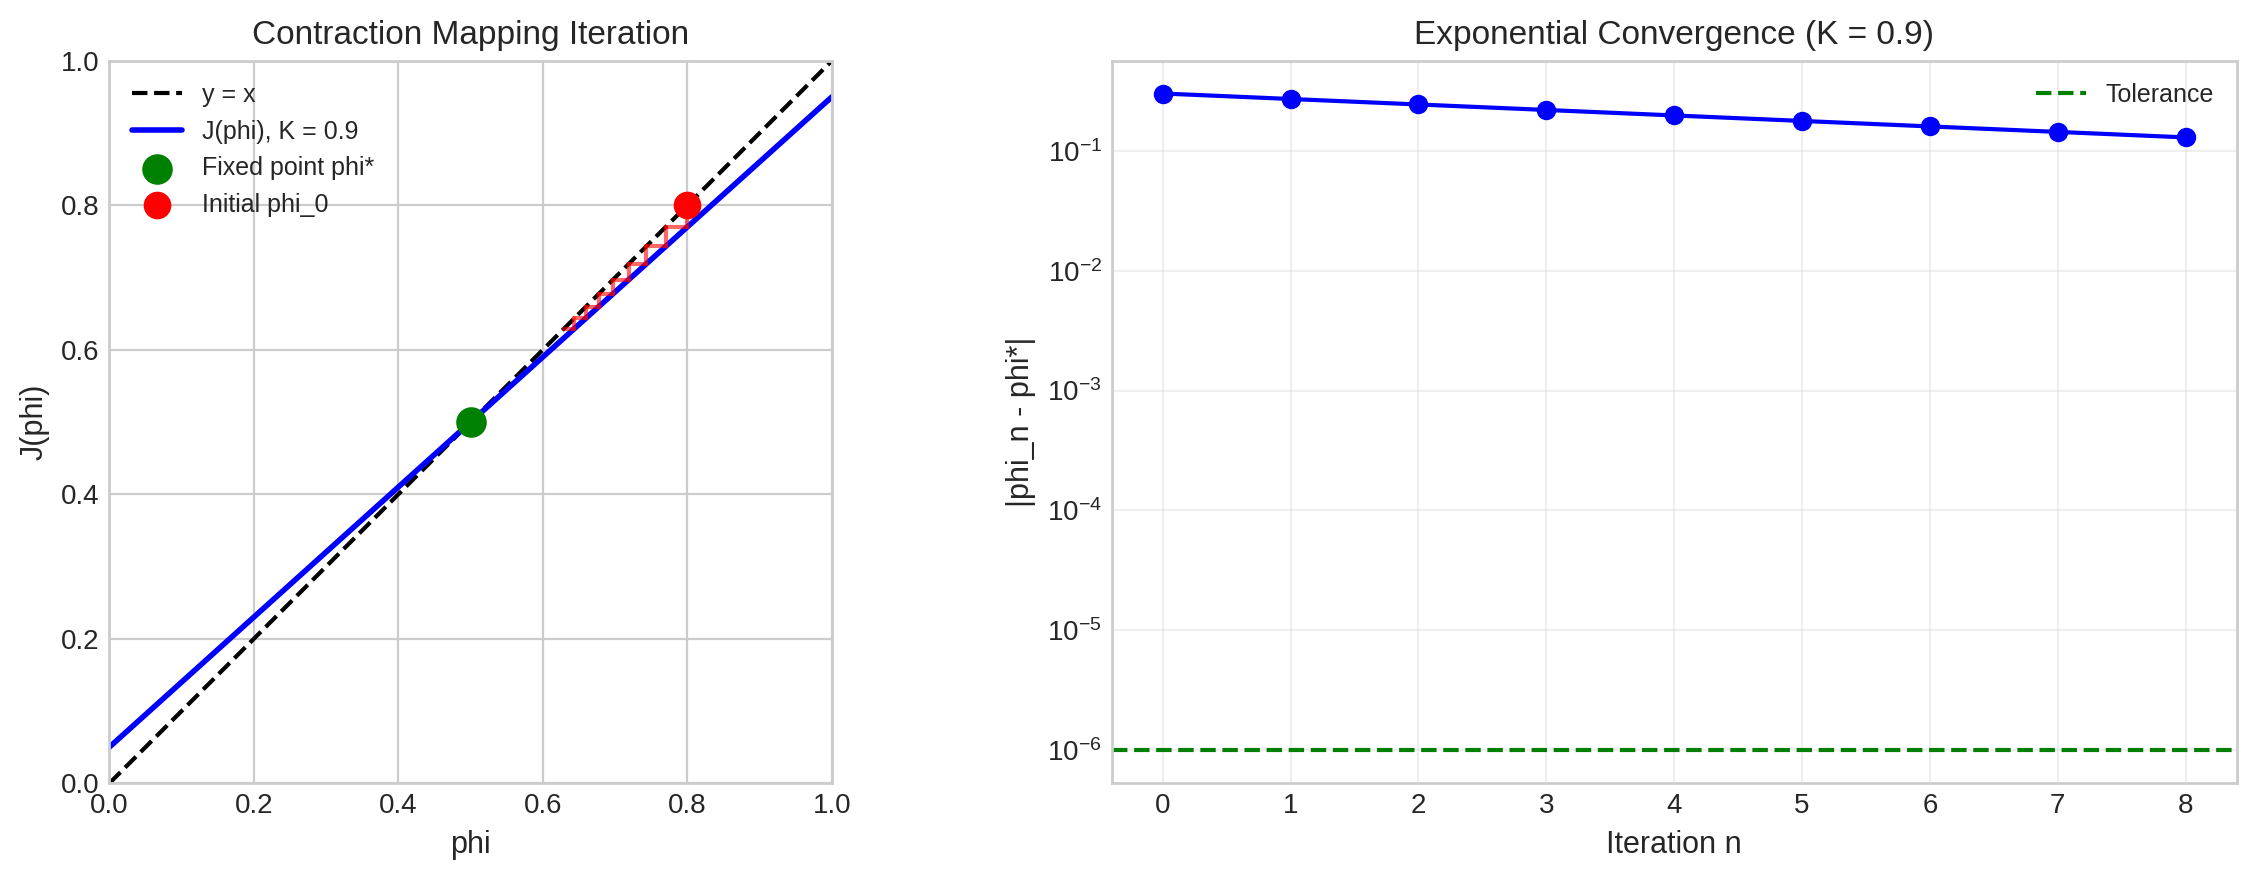

Convergence rate: K^n = 0.9^n -> 0 exponentially
After 10 iterations: error <= K^10 = 3.49e-01


In [5]:
# Visualize the contraction mapping
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))

# Left: Contraction illustration
ax = axes[0]
K = 0.9  # Contraction constant
x = np.linspace(0, 1, 100)
y_identity = x
y_contraction = K * x + 0.05  # J(x) = Kx + c

ax.plot(x, y_identity, 'k--', label='y = x', linewidth=1.5)
ax.plot(x, y_contraction, 'b-', label=f'J(phi), K = {K}', linewidth=2)

# Show iteration
x_iter = [0.8]
for _ in range(8):
    x_new = K * x_iter[-1] + 0.05
    x_iter.append(x_new)

for i in range(len(x_iter) - 1):
    ax.plot([x_iter[i], x_iter[i]], [x_iter[i], x_iter[i+1]], 'r-', alpha=0.6)
    ax.plot([x_iter[i], x_iter[i+1]], [x_iter[i+1], x_iter[i+1]], 'r-', alpha=0.6)

ax.scatter([0.5], [0.5], color='green', s=100, zorder=5, label='Fixed point phi*')
ax.scatter([x_iter[0]], [x_iter[0]], color='red', s=80, zorder=5, label='Initial phi_0')

ax.set_xlabel('phi', fontsize=11)
ax.set_ylabel('J(phi)', fontsize=11)
ax.set_title('Contraction Mapping Iteration', fontsize=12)
ax.legend(loc='upper left', fontsize=9)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')

# Right: Convergence plot
ax = axes[1]
n_iter = np.arange(len(x_iter))
fixed_point = 0.5
errors = np.abs(np.array(x_iter) - fixed_point)

ax.semilogy(n_iter, errors, 'bo-', markersize=6, linewidth=1.5)
ax.axhline(y=1e-6, color='green', linestyle='--', label='Tolerance')

ax.set_xlabel('Iteration n', fontsize=11)
ax.set_ylabel('|phi_n - phi*|', fontsize=11)
ax.set_title(f'Exponential Convergence (K = {K})', fontsize=12)
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Convergence rate: K^n = {K}^n -> 0 exponentially")
print(f"After 10 iterations: error <= K^10 = {K**10:.2e}")

---

## 3. The GIFT K7 Manifold

### 3.1 Twisted Connected Sum (TCS) Construction

The K7 manifold is constructed using the **Twisted Connected Sum** method (Kovalev, 2003):

$$\text{K7} = M_1^T \cup_{\text{K3} \times S^1} M_2^T$$

where:
- $M_1^T$: Asymptotically cylindrical Calabi-Yau 3-fold with $(b_2, b_3) = (11, 40)$
- $M_2^T$: Asymptotically cylindrical Calabi-Yau 3-fold with $(b_2, b_3) = (10, 37)$
- Gluing: Hyperkahler rotation by $\pi/2$ along the K3 surface

### 3.2 Mayer-Vietoris Computation

The Mayer-Vietoris sequence gives the Betti numbers:

$$b_2(\text{K7}) = 11 + 10 = 21$$
$$b_3(\text{K7}) = 40 + 37 = 77$$

### 3.3 The K7 Metric

The K7 manifold carries a Riemannian metric $g$ induced by the G2 structure. Key certified quantities:

| Quantity | Symbol | Value | Interpretation |
|----------|--------|-------|----------------|
| Metric determinant | det(g) | 65/32 | Volume normalization |
| Torsion coefficient | kappa_T | 1/61 | Torsion moduli scale |
| Hierarchy parameter | tau | 3472/891 | Electroweak/Planck ratio |
| Weinberg angle | sin^2(theta_W) | 3/13 | Weak mixing angle |

In [6]:
# Display certified metric quantities
print("=" * 60)
print("           K7 METRIC: CERTIFIED QUANTITIES")
print("=" * 60)
print()
print(f"  Metric determinant:")
print(f"    det(g) = {DET_G} = {float(DET_G):.5f}")
print()
print(f"  Torsion coefficient:")
print(f"    kappa_T = {KAPPA_T} = {float(KAPPA_T):.6f}")
print()
print(f"  Hierarchy parameter:")
print(f"    tau = {TAU} = {float(TAU):.4f}")
print()
print(f"  Weinberg angle:")
print(f"    sin^2(theta_W) = {SIN2_THETA_W} = {float(SIN2_THETA_W):.6f}")
print(f"    (Experimental: 0.23122)")
print()
print("=" * 60)

# Derivation check
print()
print("Derivation check:")
print(f"  sin^2(theta_W) = b2 / (b3 + dim(G2))")
print(f"                 = {B2} / ({B3} + {DIM_G2})")
print(f"                 = {B2}/{B3+DIM_G2} = {Fraction(B2, B3+DIM_G2)}")

           K7 METRIC: CERTIFIED QUANTITIES

  Metric determinant:
    det(g) = 65/32 = 2.03125

  Torsion coefficient:
    kappa_T = 1/61 = 0.016393

  Hierarchy parameter:
    tau = 3472/891 = 3.8967

  Weinberg angle:
    sin^2(theta_W) = 3/13 = 0.230769
    (Experimental: 0.23122)


Derivation check:
  sin^2(theta_W) = b2 / (b3 + dim(G2))
                 = 21 / (77 + 14)
                 = 21/91 = 3/13


---

## 4. Verification: The Joyce Certificate

### 4.1 Certified Bounds

The GIFT framework includes **pre-computed, certified bounds** on the torsion of an approximate G2 structure on K7. These bounds were obtained via Physics-Informed Neural Network (PINN) training and verified using interval arithmetic.

**Note:** This notebook does not perform PINN training - it uses the certified bounds stored in `giftpy` to verify the Joyce theorem hypotheses.

The certified bounds are:
- Torsion norm: $\|T(\varphi_0)\| \in [0.00139, 0.00141]$
- Joyce threshold: $\varepsilon_0 = 0.0288$
- Safety margin: $\varepsilon_0 / \|T\| > 20$

### 4.2 Certificate Verification

In [7]:
# Verify Joyce certificate using giftpy
print("=" * 60)
print("           JOYCE CERTIFICATE VERIFICATION")
print("=" * 60)
print()

# Get full certificate
cert = JoyceCertificate.verify()
print(cert)

print()
print("-" * 60)

# Quick verification
is_valid = verify_pinn_bounds()
if is_valid:
    print()
    print("  RESULT: Joyce theorem hypotheses SATISFIED")
    print()
    print("  ==> K7 admits a torsion-free G2 structure")
    print("  ==> K7 carries a Ricci-flat metric with Hol(g) in G2")
else:
    print()
    print("  RESULT: Certificate invalid - check bounds")

print()
print("=" * 60)

           JOYCE CERTIFICATE VERIFICATION

JoyceCertificate:
  Torsion < threshold: True
  Safety margin: 20.4x
  Contraction K < 1: True
  det(g) = 65/32: True
  Status: VALID

------------------------------------------------------------

  RESULT: Joyce theorem hypotheses SATISFIED

  ==> K7 admits a torsion-free G2 structure
  ==> K7 carries a Ricci-flat metric with Hol(g) in G2



In [8]:
# Display numerical bounds
print("=" * 60)
print("           NUMERICAL BOUNDS DETAIL")
print("=" * 60)
print()
print(f"  Certified torsion bound:")
print(f"    ||T(phi_0)|| in [{float(TORSION_BOUND.lo):.5f}, {float(TORSION_BOUND.hi):.5f}]")
print()
print(f"  Joyce threshold:")
print(f"    eps_0 = {float(JOYCE_THRESHOLD.lo):.4f}")
print()
margin = float(JOYCE_THRESHOLD.lo) / float(TORSION_BOUND.hi)
print(f"  Safety margin:")
print(f"    eps_0 / ||T|| = {margin:.1f}x  (requirement: > 20x)")
print()
print(f"  Contraction constant:")
print(f"    K = {float(CONTRACTION_K.lo)} < 1")
print()
print(f"  Metric determinant verification:")
print(f"    det(g) in [{float(DET_G_BOUND.lo):.5f}, {float(DET_G_BOUND.hi):.5f}]")
print(f"    Exact target: {DET_G} = {float(DET_G_TARGET):.5f}")
print(f"    Target in interval: {DET_G_BOUND.contains(DET_G_TARGET)}")
print()
print("=" * 60)

           NUMERICAL BOUNDS DETAIL

  Certified torsion bound:
    ||T(phi_0)|| in [0.00139, 0.00141]

  Joyce threshold:
    eps_0 = 0.0288

  Safety margin:
    eps_0 / ||T|| = 20.4x  (requirement: > 20x)

  Contraction constant:
    K = 0.9 < 1

  Metric determinant verification:
    det(g) in [2.03124, 2.03126]
    Exact target: 65/32 = 2.03125
    Target in interval: True



---

## 5. Physical Implications

### 5.1 From Geometry to Physics

The existence of a torsion-free G2 structure on K7 has profound physical implications:

| Mathematical Property | Physical Consequence |
|----------------------|---------------------|
| Hol(g) in G2 | N=1 supersymmetry in 4D |
| Ric(g) = 0 | Einstein equations satisfied (vacuum) |
| b2 = 21 | 21 massless U(1) gauge fields |
| b3 = 77 | 77 moduli (shape parameters) |
| chi = 0 | Anomaly cancellation |

### 5.2 The Main Existence Theorem

We can now state the formalized theorem:

```lean
theorem k7_admits_torsion_free_g2 :
    exists phi : G2Space, IsTorsionFree phi
```

**In English:** *The K7 manifold admits a torsion-free G2 structure, implying it carries a Ricci-flat metric with holonomy contained in G2.*

In [9]:
# Final summary
print("=" * 60)
print("           SUMMARY")
print("=" * 60)
print()
print(f"  Joyce Certificate: {'VALID' if cert.is_valid() else 'INVALID'}")
print(f"  Safety Margin: {float(cert.safety_margin):.1f}x")
print()
print(f"  K7 Topology:")
print(f"    b2 = {B2}, b3 = {B3}, H* = {H_STAR}")
print()
print(f"  Certified Values:")
print(f"    det(g) = {DET_G} = {float(DET_G):.5f}")
print(f"    kappa_T = {KAPPA_T}")
print(f"    sin^2(theta_W) = {SIN2_THETA_W}")
print()
print("  For more: from gift_core import PROVEN_RELATIONS")
print("=" * 60)

           SUMMARY

  Joyce Certificate: VALID
  Safety Margin: 20.4x

  K7 Topology:
    b2 = 21, b3 = 77, H* = 99

  Certified Values:
    det(g) = 65/32 = 2.03125
    kappa_T = 1/61
    sin^2(theta_W) = 3/13

  For more: from gift_core import PROVEN_RELATIONS


---

## 6. References

1. **Joyce, D.** (1996). "Compact Riemannian 7-manifolds with holonomy G2." *J. Diff. Geom.* 43(2), 291-328.

2. **Kovalev, A.** (2003). "Twisted connected sums and special Riemannian holonomy." *J. Reine Angew. Math.* 565, 125-160.

3. **Bryant, R.** (1987). "Metrics with exceptional holonomy." *Ann. Math.* 126, 525-576.

4. **GIFT Framework**: [github.com/gift-framework/GIFT](https://github.com/gift-framework/GIFT)

5. **giftpy Documentation**: [github.com/gift-framework/core](https://github.com/gift-framework/core)

---

*This notebook is part of the GIFT Framework. Licensed under MIT.*